#**Business Objective:**

The goal of this project is to develop a robust forecasting model for hourly energy consumption within the PJM Interconnection region of the United States. Using historical megawatt (MW) demand data, the project aims to uncover patterns related to hourly usage, seasonality, and holiday effects, and to ultimately generate accurate 30-day energy demand forecasts. These insights can support operational planning, peak load management, and data-driven energy distribution across PJM's extensive multi-state grid.

#Dataset Details:

* **Datetime:** This column has the date and time recorded for the energy demand.
* **PJMW_MW:** This column has the enery units recorded at the given particular date and time.

In [2]:
#  Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar

import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style="whitegrid")

In [3]:
#  Load the dataset
df = pd.read_csv("/content/PJMW_Energy_Demand.csv")
df.head()

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0


In [4]:
df.shape

(143206, 2)

In [5]:
df.columns

Index(['Datetime', 'PJMW_MW'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143206 entries, 0 to 143205
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  143206 non-null  object 
 1   PJMW_MW   143206 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [13]:
# Checking for Null Values
print(df.isnull().sum().sum())

0


In [14]:
# Let's Check for duplicates
print(df.duplicated().sum())

0


In [15]:
# Convert 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [17]:
# Set 'Datetime' as the index for time-series analysis
df.set_index('Datetime', inplace=True)

In [19]:
daily_df = round(df["PJMW_MW"].resample('D').mean(),2)
daily_df

,PJMW_MW
Datetime,
2002-04-01,5271.17
2002-04-02,5310.42
2002-04-03,5325.92
2002-04-04,5670.79
2002-04-05,5686.12
...,...
2018-07-30,5492.71
2018-07-31,5660.75
2018-08-01,5959.71


In [21]:
daily_df.duplicated().sum()

np.int64(265)

<Axes: xlabel='Datetime'>

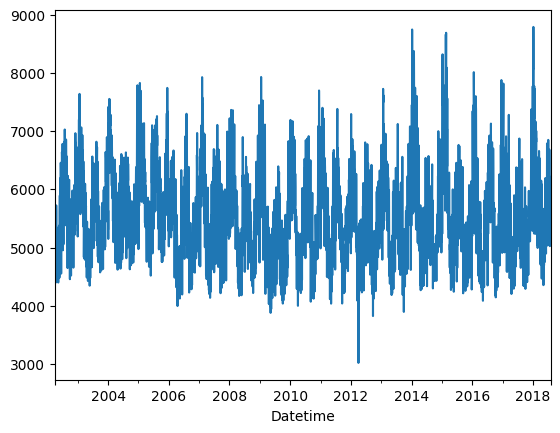

In [22]:
daily_df.plot()